In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/Google_Stock_Price_Train.csv")

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set =training_set.iloc[:,1:2].values

In [5]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [8]:
X_train=training_set[0:1257]

In [9]:
y_train=training_set[1:1258]

In [10]:
X_train=np.reshape(X_train,(1257,1,1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\mohamed ismail\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [14]:
regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.1195
Epoch 2/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0892
Epoch 3/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0757
Epoch 4/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0705
Epoch 5/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0683
Epoch 6/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0667
Epoch 7/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.0653
Epoch 8/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.0636
Epoch 9/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0619
Epoch 10/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0602
Epoch 11/200
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0583
Epoch 12/200
1257/1257 [==============================] - 4s 3ms/step - lo

1257/1257 [==============================] - 3s 3ms/step - loss: 2.4564e-04
Epoch 96/200
1257/1257 [==============================] - 4s 3ms/step - loss: 2.4507e-04
Epoch 97/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4533e-04
Epoch 98/200
1257/1257 [==============================] - 4s 3ms/step - loss: 2.4535e-04
Epoch 99/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4589e-04
Epoch 100/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4529e-04
Epoch 101/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4509e-04
Epoch 102/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4529e-04
Epoch 103/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4505e-04
Epoch 104/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4711e-04
Epoch 105/200
1257/1257 [==============================] - 3s 3ms/step - loss: 2.4468e-04
Epoch 106/200
1257/1257 [===

In [17]:
test_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/Google_Stock_Price_Test.csv")

In [18]:
real_stock_price=test_set.iloc[:,1:2].values

In [20]:
inputs=real_stock_price

In [21]:
inputs=sc.transform(inputs)

In [22]:
inputs=np.reshape(inputs,(20,1,1))

In [23]:
predicted_stock_price=regressor.predict(inputs)

In [24]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

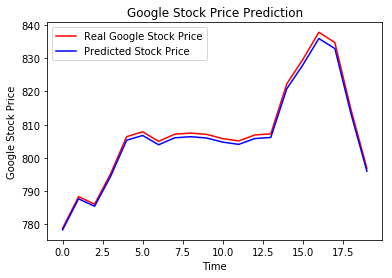

In [25]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [26]:
real_stock_price_train=pd.read_csv("C:/Users/mohamed ismail/Desktop/Google_Stock_Price_Train.csv")

In [27]:
real_stock_price_train=real_stock_price_train.iloc[:,1:2].values

In [29]:
predicted_stock_price_train=regressor.predict(X_train)
predicted_stock_price_train=sc.inverse_transform(predicted_stock_price_train)

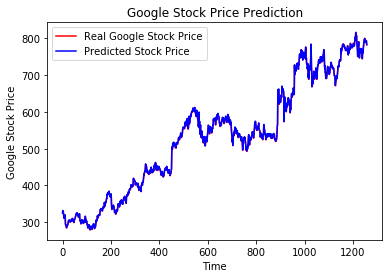

In [35]:
plt.plot(real_stock_price_train,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price_train,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [38]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [39]:
rmse

1.1670618502114694